***Chloe Quinto*** <br>
CPE 462: Image Processing<br>
HW 6 in Python<br>
4/17/19<br>
I plege my honor that I have abided by the Stevens Honor System - Chloe Quinto <br>

HW 6 in C++ would not build successfully even after specifying X11 library paths as well as headers. I will attempt to write python code in replacement 

In [2]:
import cv2 
import numpy as np
import matplotlib
from pylab import *
from scipy.signal import convolve2d
from scipy.misc import imfilter

In [3]:
img = cv2.imread('lenna_gray.jpeg',0)

Text(0.5, 1.0, 'Original Image')

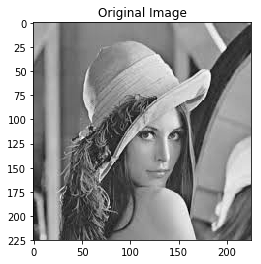

In [7]:
imshow(img,cmap="gray")
title('Original Image')

6.1 <br> 
Let's try to make the negative image. This can be done by subtracting pixel values by 255. Instead of creating a for loop that iterates through all pixels, this can be done shortly in matlab with one line

In [8]:
img4=255-img;

Text(0.5, 1.0, 'Inverted Image')

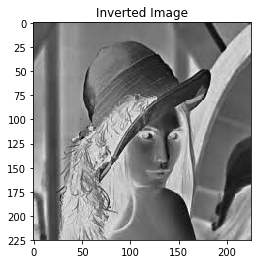

In [11]:
imshow(img4, cmap='gray')
title('Inverted Image')

6.2 <br> 
Histogram Equalization is a method to increase contrast. First, we plot the histogram of intensities of the original image to see the distribution of the image.  

In [12]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

In [13]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

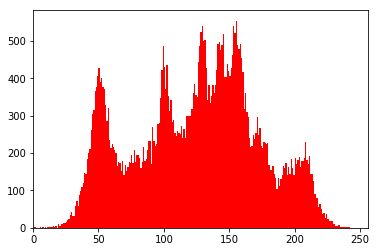

In [14]:
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

The histogram of the original image. 

In [15]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [16]:
img2 = cdf[img]

Text(0.5, 1.0, 'New Image')

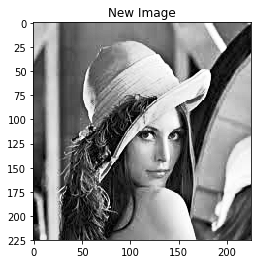

In [17]:
imshow(img2, cmap='gray')
title('New Image')

Text(0.5, 1.0, 'New Image')

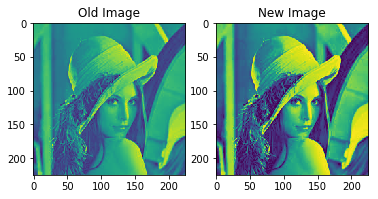

In [18]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmpa)
ax[0].set_title("Old Image")
ax[1].imshow(img2)
ax[1].set_title("New Image")

As you can see, the new image has more contrast than the old image. Let's see what the new image's histogram looks like.

In [54]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

In [55]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

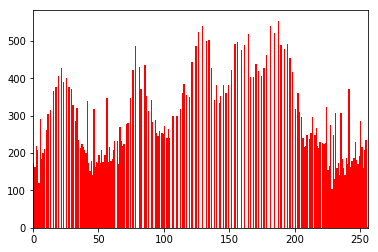

In [56]:
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

After normalizing the histogram of the original image, we get a more evenly distributed histogram and therefore, high contrast image 

6.3 <br> 
The final portion of this assignment is to filter the image with a 3x3 mask as we have seen in class. I created a laplacian filter. 

In [57]:
img0 = cv2.imread('lenna_gray.jpeg')

In [58]:
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

In [59]:
img = cv2.GaussianBlur(gray,(3,3),0)

In [60]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)

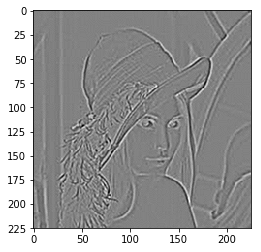

In [61]:
plt.imshow(laplacian,cmap = 'gray')

Text(0.5, 1.0, 'Laplace Filter')

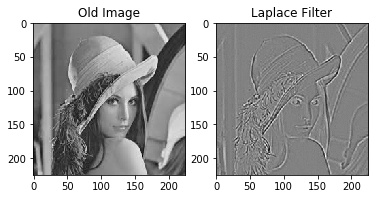

In [62]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img0)
ax[0].set_title("Old Image")
ax[1].imshow(laplacian, cmap="gray")
ax[1].set_title("Laplace Filter")